In [33]:
import os
import sys
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import numpy as np
from get_min_max_voxel import summary
from glob import glob
import importlib
from srgan_3d import SRGAN
from data_loader import DataLoader, test_preprocessing, show_slices
mod = importlib.reload(sys.modules['data_loader'])
vars().update(mod.__dict__) 

In [34]:
trainset_path = "trainset/**/*.nii"
H_R = (256, 256, 166)
L_R = (41, 256, 166)
#nii_names = list(map(lambda st:st.split('/')[-1], paths))
#l = list(map(lambda st:print(st), nii_names))


In [35]:
d = {}
loader = DataLoader(H_R, L_R)
h_imgs, l_imgs = loader.load_data(trainset_path, batch_size=1)
print(l_imgs.shape)

(1, 41, 256, 166)


In [ ]:
#{(192, 192, 160): 1036, (256, 256, 180): 294, (256, 256, 166): 1046, (256, 256, 170): 298, (256, 256, 184): 56, (256, 256, 162): 2, (256, 256, 146): 1, (256, 256, 165): 1, (256, 256, 124): 1, (256, 256, 161): 3, (256, 256, 150): 3}

(41, 256, 166)


ValueError: Affine should be shape 4,4

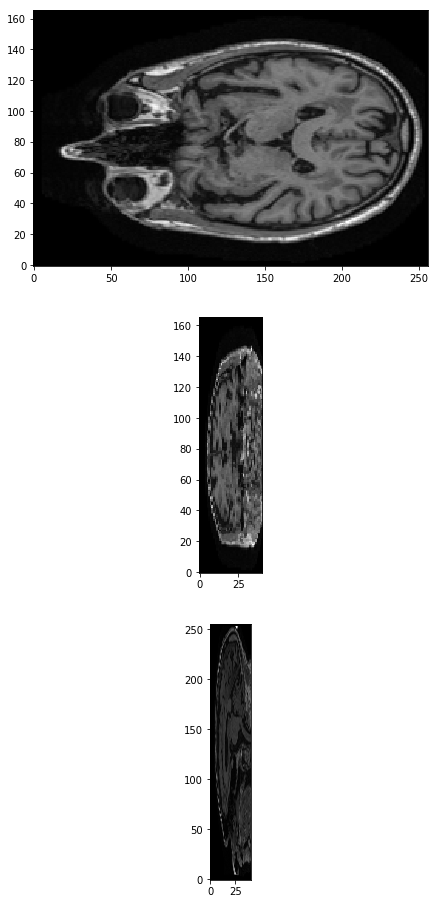

In [38]:
data1 = l_imgs[0]
#data1 = test_preprocessing(epi_imgs[0])
x,y,z=data1.shape
print(data1.shape)
show_slices([data1[x//2, :, :],data1[:, y//2, :], data1[:, :, z//2]])
nib.save(nib.Nifti1Image(data1, np.eye(3)), "test.nii")

In [33]:
epi_img_data_stand = zoom(epi_img_data, (0.5, 1, 1))
x,y,z = epi_img_data_stand.shape

In [4]:

np.max(epi_img_data)

4878.0

Text(0.5,0.98,'center slices for EPI image')

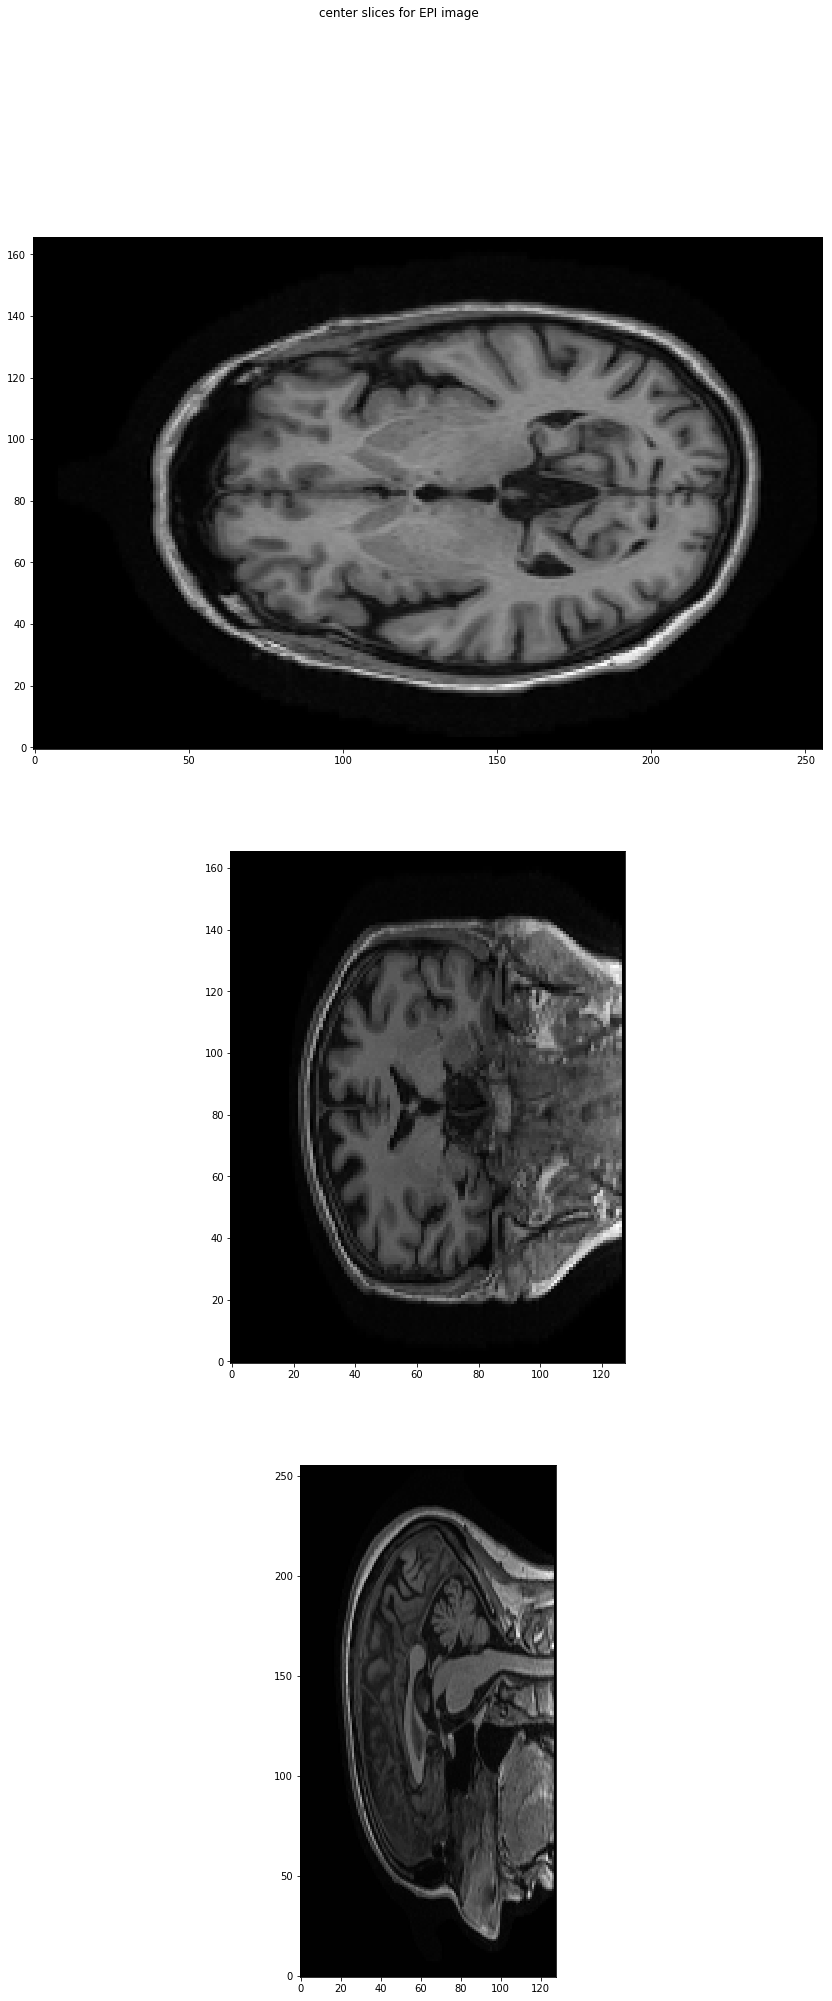

In [36]:
slice0 = epi_img_data_stand[x//2,:,:]
slice1 = epi_img_data_stand[:,y//2,:]
slice2 = epi_img_data_stand[:,:,z//2]
show_slices([slice0, slice1, slice2])
plt.suptitle("center slices for EPI image")